In [1]:
from gw_hyp import get_hyp_waveform as gywq, cal_sp_sx, cal_sp_sx_A, hyp_pta_res
from constants import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt

In [2]:
M0=1e10
q=1
e0=1.1
b=100


In [3]:
x0=sqrt(e0**2-1)/b
n0=x0**(3/2)/(M0*tsun)
n0

6.612118359704331e-09

In [4]:
ti=-1
tf=1
t_step=1000
inc=np.pi/3
order=3
tarr=np.linspace(ti,tf,t_step)*yr
eta=q/(1+q)**2

In [5]:
D_GW=1.6*1e9*pc

In [6]:
S0= (M0*dsun)*x0*eta/(D_GW*n0)
S0

4.9389910328617316e-08

In [7]:
import enterprise
from enterprise.pulsar import Pulsar

In [8]:
datadir = f"{enterprise.__path__[0]}/datafiles/mdc_open1"
parfile = f"{datadir}/J0030+0451.par"
timfile = f"{datadir}/J0030+0451.tim"

In [9]:
psr = Pulsar(parfile, timfile)

[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 


In [10]:
from gw_functions import hms_to_rad, dms_to_rad

In [11]:
RA_GW = 0.5
DEC_GW = 0.75
cos_inc=0.5
tref1 = (max(psr.toas)+min(psr.toas))/2

In [12]:
gwhyp_params = {
    "cos_gwtheta": np.sin(DEC_GW),
    "gwphi": RA_GW,
    "psi": 0,
    "cos_inc": cos_inc,
    "log10_M": np.log10(M0),
    "q": q,
    "log10_n":np.log10(n0),
    "e0":e0,
    "log10_S":np.log10(S0),
    "tref": tref1
}

In [13]:
signal=hyp_pta_res(toas=psr.toas,
theta = psr.theta,
phi = psr.phi,
**gwhyp_params)

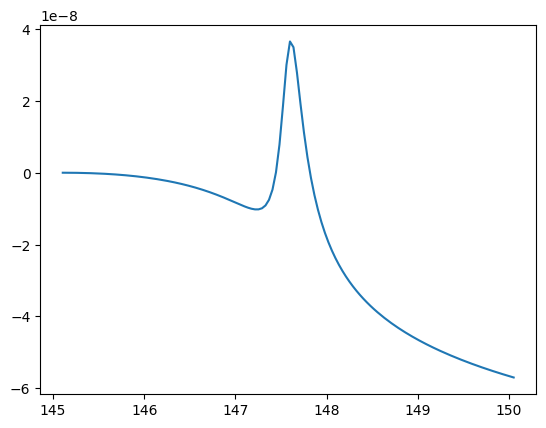

In [14]:
plt.plot(psr.toas / yr,signal)